<a href="https://colab.research.google.com/github/dev-bhaveshye/Machine-Learning/blob/main/Regression_Metrics_%7C_MSE%2C_MAE_%26_RMSE_%7C_R2_Score_%26_Adjusted_R2_Score_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('/content/placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

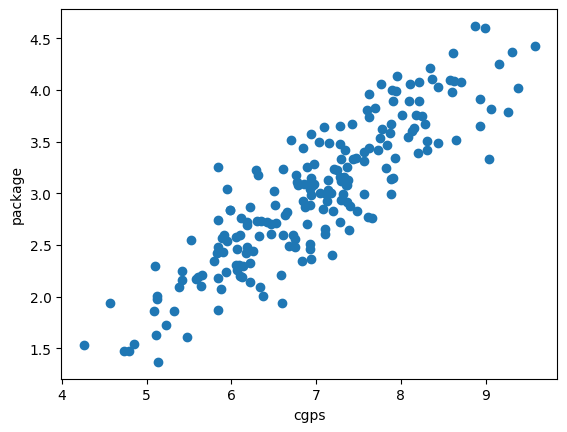

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('cgps')
plt.ylabel('package')
plt.show()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,0:1],df.iloc[:,1],test_size=0.2,random_state=2)

In [ ]:
x_train.shape

(160, 1)

In [ ]:
y_train.shape

(160,)

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.predict(x_test)
lr.score(x_test,y_test)

0.780730147510384

In [ ]:
x_test.head()

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57


In [ ]:
y_test.head()

,package
112,4.10
29,3.49
182,2.08
199,2.33
193,1.94


In [ ]:
lr.predict(x_test)

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

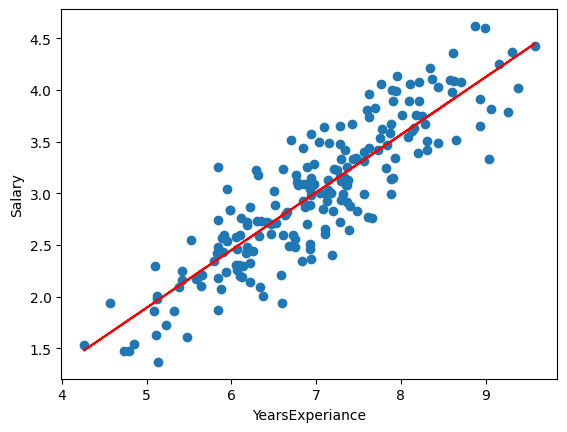

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('YearsExperiance')
plt.ylabel('Salary')
plt.show()

In [ ]:
m=lr.coef_

In [ ]:
b=lr.intercept_


In [ ]:
b

-0.8961119222429144

In [ ]:
#y=mx+b
m*6.1+b

array([2.50739512])

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
#calculating mean_absolute_error
mean_absolute_error(y_test,lr.predict(x_test))

0.2884710931878175

In [ ]:
#calculating mean_squared_error
print(mean_squared_error(y_test,lr.predict(x_test)))
print("rmse is " ,np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

0.12129235313495527
rmse is  0.34827051717731616


In [ ]:
#calculating R2_score
r2_score=r2_score(y_test,lr.predict(x_test))
print(r2_score)

0.780730147510384


In [ ]:
#adjusted r2 score
x_test.shape

(40, 1)

In [ ]:
1-(1-r2_score)*(40-1)/(40-1-1)

0.7749598882343415

**INSERTING IRRELEVANT COLUMN**

In [ ]:
new_df=df.copy()
new_df['random']=np.random.randint(0,100,size=len(new_df))
new_df.head()

,cgpa,package,random
0,6.89,3.26,2
1,5.12,1.98,13
2,7.82,3.25,20
3,7.42,3.67,52
4,6.94,3.57,22


In [ ]:
new_df.shape

(200, 3)

In [ ]:
x_new=new_df[['cgpa','random']]
y_new=new_df['package']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.2,random_state=2)

In [ ]:
x_train.shape

(160, 2)

In [ ]:
x_test.shape

(40, 2)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)


In [ ]:
#calculating mean_absolute_error
mean_absolute_error(y_test,lr.predict(x_test))

0.28905518843567235

In [ ]:
#calculating mean_squared_error
print(mean_squared_error(y_test,lr.predict(x_test)))
print("rmse is " ,np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

0.12087355840360262
rmse is  0.3476687480973845


In [ ]:
#calculating R2_score
r2_score_new=r2_score(y_test,y_pred)
print(r2_score_new)

0.7814872361197951


In [ ]:
#adjusted r2 score
1-(1-r2_score_new)*(40-1)/(40-1-1)

0.7757369002282107

**NOW INSERTING RELEVANT FEATURE**

In [ ]:
new_df2=df.copy()
new_df2['iq']=df['package']+(np.random.randint(-10,10,200)/10)
new_df2 = new_df2[['cgpa','iq','package']]

In [ ]:
new_df2.head()

,cgpa,iq,package
0,6.89,3.76,3.26
1,5.12,1.98,1.98
2,7.82,2.85,3.25
3,7.42,3.77,3.67
4,6.94,3.37,3.57


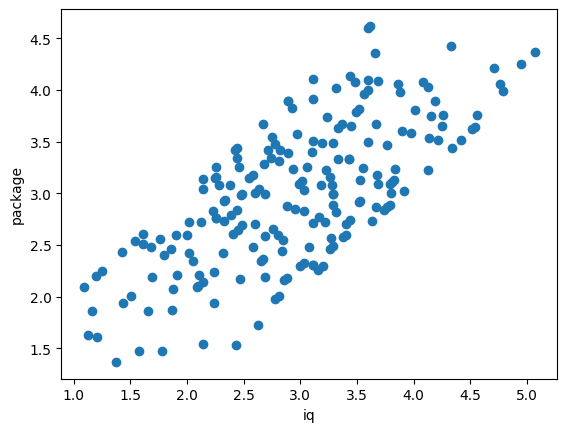

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('package')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
x2=new_df2[['cgpa','iq']]
y2=new_df2['package']


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.2,random_state=2)

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [ ]:
y_pred_new=lr.predict(x_test)

In [ ]:
#calculating mean_absolute_error
mean_absolute_error(y_test,y_pred_new)

0.2501974942146966

In [ ]:
#calculating mean_squared_error
print(mean_squared_error(y_test,y_pred_new))
print("rmse is " ,np.sqrt(mean_squared_error(y_test,y_pred_new)))

0.09427686728258104
rmse is  0.3070453830992758


In [ ]:
#calculating R2_score
r2_score_2=r2_score(y_test,y_pred_new)
print(r2_score_2)

0.8295681941364105


In [ ]:
#adjusted r2 score
1-(1-r2_score_2)*(40-1)/(40-1-1)

0.8250831466136844